<a href="https://colab.research.google.com/github/jadhav-rakesh/ML/blob/main/ds17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Support Vector Machine

In [1]:
import numpy as np
import pandas as pd

#Training a Linear Classifier

In [2]:
from sklearn.svm import LinearSVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()

features = iris.data[:100, :2]
target = iris.target[:100]

scaler = StandardScaler()
features_standerdized = scaler.fit_transform(features)

svc = LinearSVC(C=1.0)

model = svc.fit(features_standerdized, target)

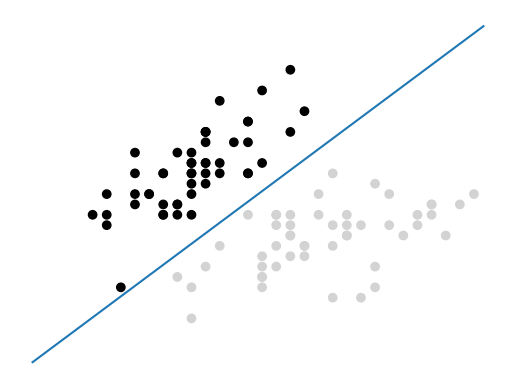

In [3]:
import matplotlib.pyplot as plt

color = ["black" if c==0 else "lightgrey" for c in target]
plt.scatter(features_standerdized[:,0], features_standerdized[:,1], c=color)

w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2.5, 2.5)
yy = a * xx - (svc.intercept_[0] / w[1])

plt.plot(xx, yy)
plt.axis("off")
plt.show()

In [4]:
new_observation = [[-2, 3]]

svc.predict(new_observation)

array([0])

#Handling Linearly Inseparable Classes Using Kernels

In [5]:
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

np.random.seed(42)

features = np.random.randn(200, 2)

target_xor = np.logical_xor(features[:, 0] > 0, features[:, 1] > 0)
target = np.where(target_xor, 0, 1)

svc = SVC(kernel="rbf", random_state=0, gamma=1, C=1)

model = svc.fit(features, target)

In [13]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier):
    cmap = ListedColormap(("red", "blue"))
    xx1, xx2 = np.meshgrid(np.arange(-3, 3, 0.02),np.arange(-3, 3, 0.02))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.1, cmap=cmap)

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker="+", label=cl)

In [11]:
svc_linear = SVC(kernel="linear", random_state=0, C=1)

svc_linear.fit(features, target)

SVC(C=1, kernel='linear', random_state=0)

<ipython-input-13-ba8c22a28823>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1],


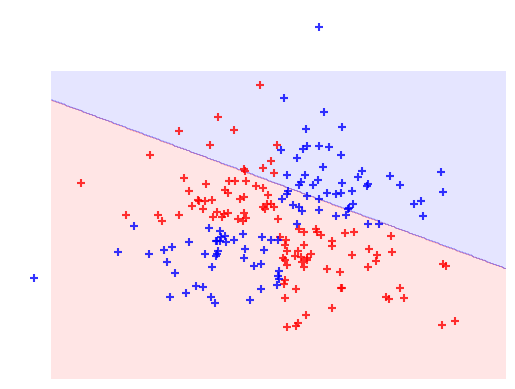

In [14]:
plot_decision_regions(features, target, classifier=svc_linear)
plt.axis("off")
plt.show()

In [15]:
scv = SVC(kernel="rbf", random_state=42, gamma=1, C=1)

model = scv.fit(features, target)

<ipython-input-13-ba8c22a28823>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1],


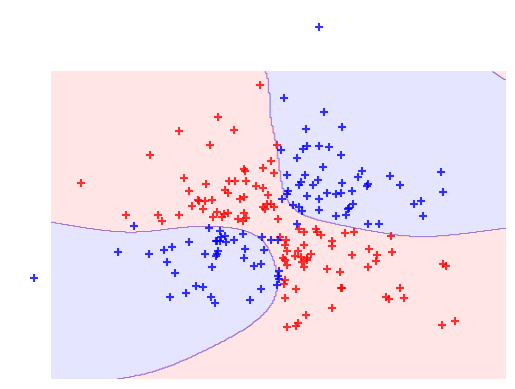

In [17]:
plot_decision_regions(features, target, classifier=svc)
plt.axis("off")
plt.show()

# Creating Predicted Probabilities

In [23]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()

features, target = iris.data, iris.target

scaler = StandardScaler()
features_standerdized = scaler.fit_transform(features)

svc = SVC(kernel="linear", probability=True, random_state=42)

model = svc.fit(features_standerdized, target)

new_observation = [[.4, .4, .4, .4]]

model.predict_proba(new_observation)

array([[0.00618046, 0.96119978, 0.03261976]])

#Identifying Support Vectors

In [24]:
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

iri = datasets.load_iris()

features = iris.data[:100, :]
target = iris.target[:100]

scaler = StandardScaler()
features_standerdized = scaler.fit_transform(features)

svc = SVC(kernel="linear", random_state=0)

model = svc.fit(features_standerdized, target)

model.support_vectors_

array([[-0.5810659 ,  0.42196824, -0.80497402, -0.50860702],
       [-1.52079513, -1.67737625, -1.08231219, -0.86427627],
       [-0.89430898, -1.4674418 ,  0.30437864,  0.38056609],
       [-0.5810659 , -1.25750735,  0.09637501,  0.55840072]])

In [27]:
model.support_

array([23, 41, 57, 98], dtype=int32)

In [26]:
model.n_support_

array([2, 2], dtype=int32)

#Handling Imbalanced Classes

In [29]:
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()

features = iris.data[:100, :]
target = iris.target[:100]

features = features[40:,]
target = target[40:]

target = np.where((target==0), 0, 1)

scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

svc = SVC(kernel="linear", class_weight="balanced", C=1.0, random_state=42)

model.fit(features_standardized, target)

SVC(kernel='linear', random_state=0)